In [1]:
import os
os.chdir("../")

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import json
import cv2
import matplotlib.pyplot as plt

In [14]:
from preprocessing.preprocess import *
from IPython.display import Image
import PIL.Image

image_path = "test/example_forms/uceni/scan-h2.png"
with open("test/example_forms/uceni/config.json", 'r') as f:
    config = json.load(f) 

image size bounded by corners is
(2032, 1415)


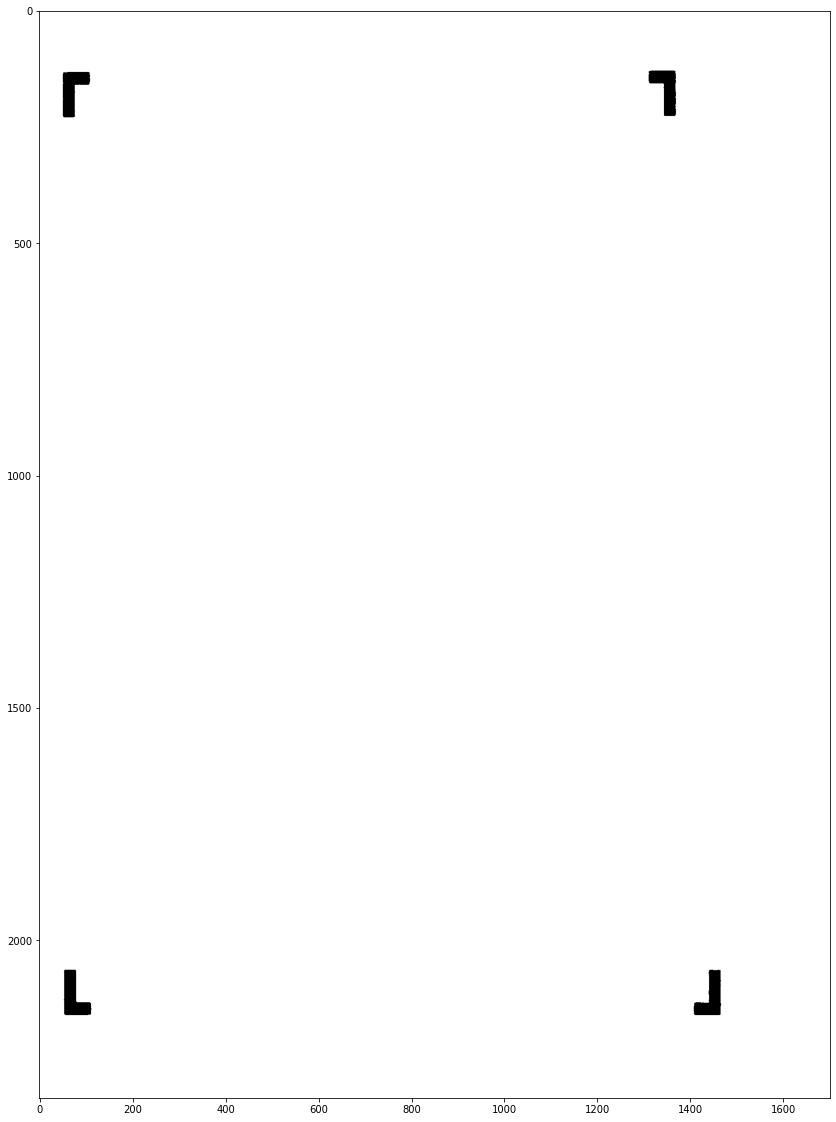

In [16]:
%matplotlib inline


im = cv2.imread(image_path)


im = normalize(im, show_borders=True)

corners = get_corners(im)

print("image size bounded by corners is")
outmost = sort_points_counter_clockwise(get_outmost_points(corners))
imm = crop_to_corners(im, outmost)
print(imm.shape)

canvas = np.zeros_like(im)
cv2.drawContours(image = canvas, contours = corners,contourIdx= -1, color= (255, 0, 0), thickness = -1)
plt.figure(figsize = (20,20))
plt.imshow(canvas, cmap="Greys")
plt.show()



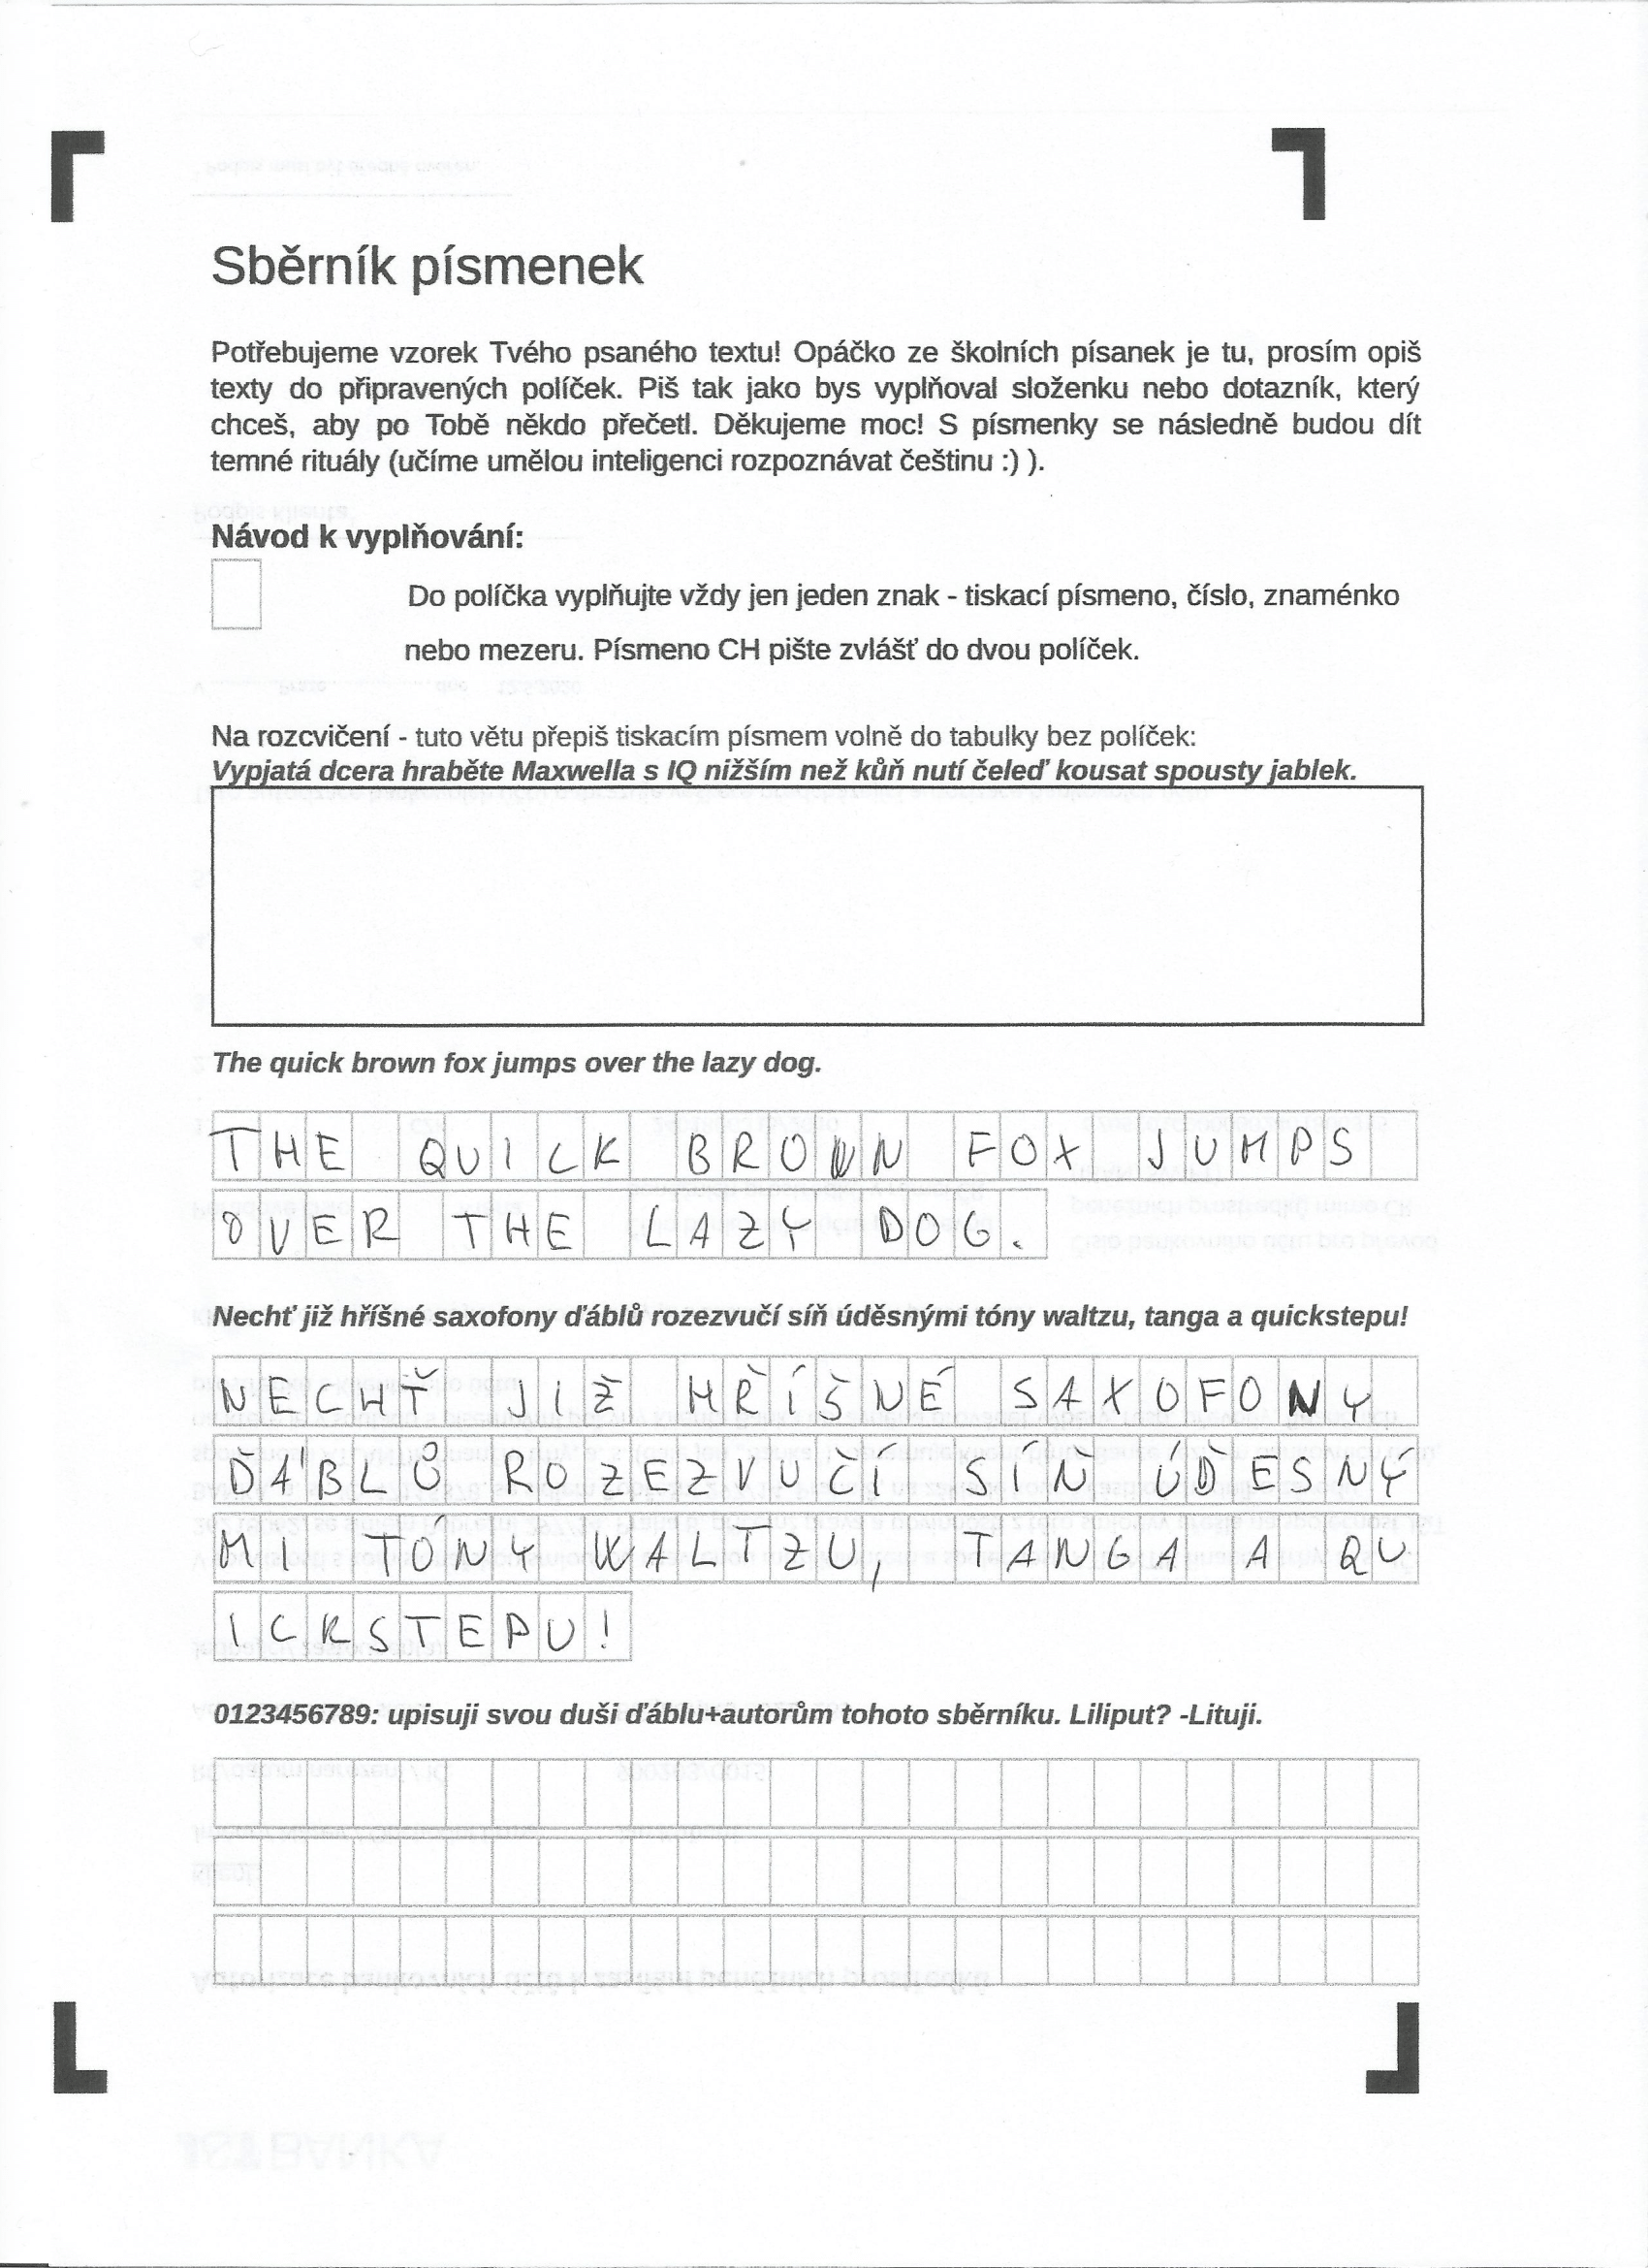

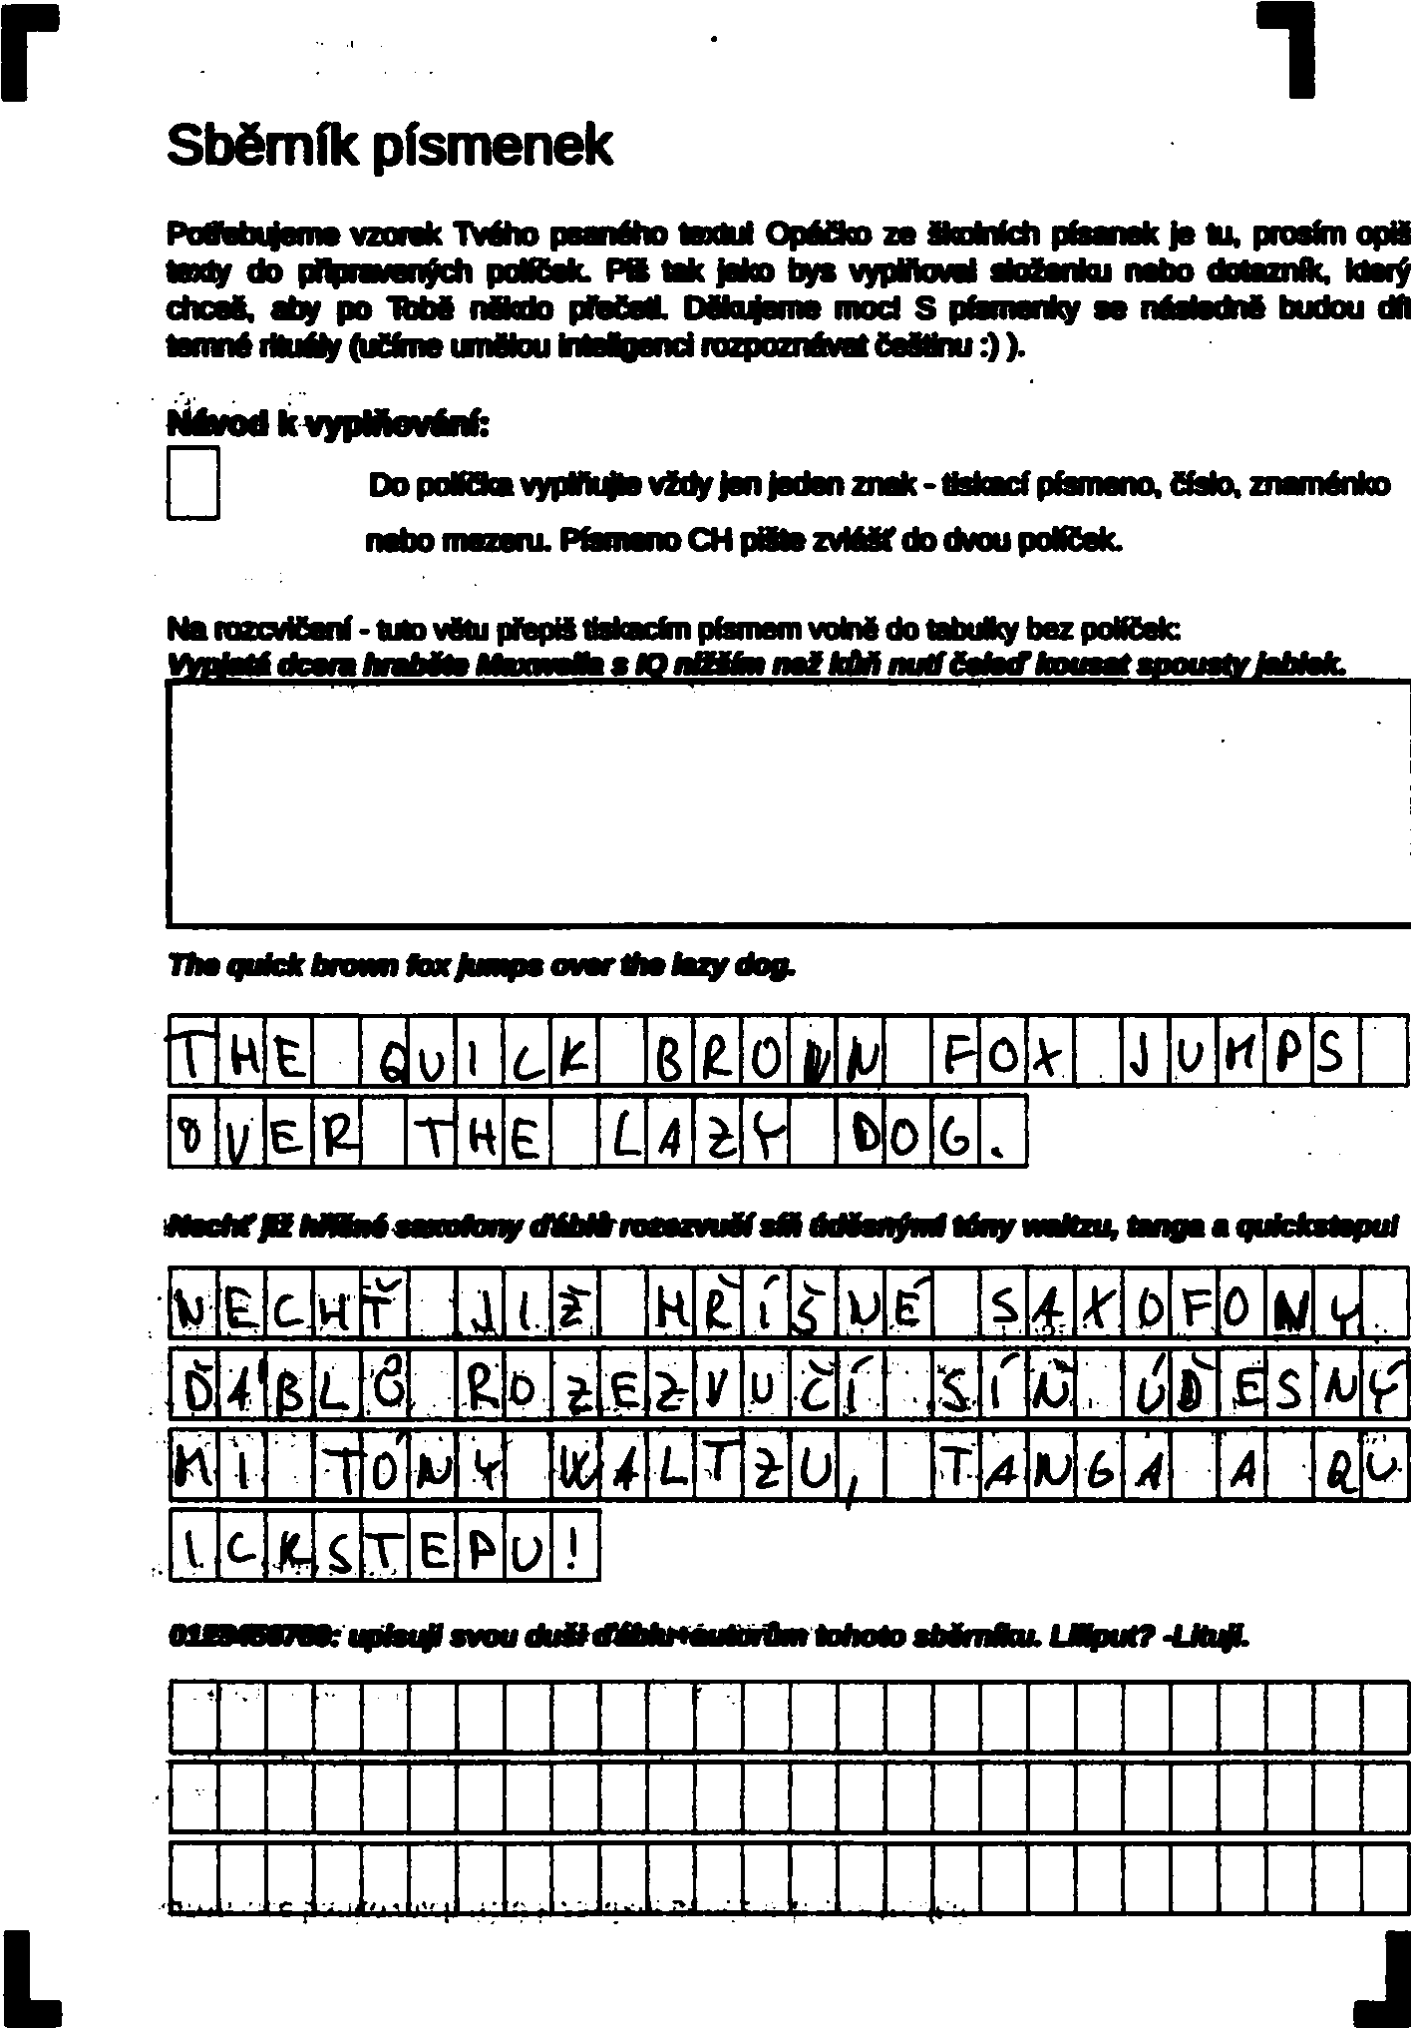

In [17]:
from preprocessing.preprocess import preprocess
from IPython.display import Image

import PIL.Image


im = cv2.imread(image_path)
img = preprocess(im, config, show_borders=True)

display(Image(image_path))

display(PIL.Image.fromarray(img))